In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import util
import random
import ast

In [42]:
df1 = pd.read_csv('./data/collections_all_science_out900.csv')
df2 = pd.read_csv('./data/collections_all_science_out900-1000.csv')
df3 = pd.read_csv('./data/collections_all_science_out1000-2500.csv')
df4 = pd.read_csv('./data/collections_all_science_out2500-4000.csv')
df5 = pd.read_csv('./data/collections_all_science_out4000-5000.csv')
df6 = pd.read_csv('./data/collections_all_science_out5000-5500.csv')
df7 = pd.read_csv('./data/collections_all_science_out5500-rest.csv')

In [43]:
for i in [df1,df2,df3,df4,df5,df6,df7]:
    i.rename(columns={'id':'resource_id'},inplace=True)

In [44]:
df1 = df1.iloc[:900,:]
df2 = df2.iloc[900:1000,:]
df3 = df3.iloc[1000:2500,:]
df4 = df4.iloc[2500:4000,:]
df5 = df5.iloc[4000:5000,:]
df6 = df6.iloc[5000:5500,:]
df7 = df7.iloc[5500:,:]

In [45]:
df = df1.append(df2.append(df3.append(df4.append(df5.append(df6.append(df7))))))

In [46]:
df.description.fillna('', inplace=True)
df.narration.fillna('', inplace=True)

In [47]:
df.Summarisation.fillna(df.title + ". " + df.description, inplace=True)

In [48]:
df.Summarisation.isna().sum()

0

In [49]:
# df.Summarisation = df.Summarisation + ', ' + df.narration

In [52]:
df.Summarization = df.apply(lambda x: x['Summarization'] + '. ' + x['narration']  if x['Summarization'][-1]!='.' else x['Summarization'] + x['narration'],axis=1)

In [116]:
df.iloc[:,1:].to_csv('./data/collections_all_science_out.csv',index=False)

In [14]:
df_lda = pd.read_csv('./data/collections_all_science_out-temp_lda.csv')

In [15]:
df_lda.Summarization = df_lda.Summarization.apply(util.clean_html)

In [16]:
collections = util.generate_collections(df_lda)

In [17]:
rand_col = util.generate_random_collections(df_lda,5000,7)

In [18]:
new_df = util.generate_pairs_df(collections)

In [19]:
new_df_rand = util.generate_pairs_df(rand_col, True)

In [20]:
def KL(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(a * np.log(a/b))

In [21]:
new_df['lda_topics1'] = new_df.lda_topics1.apply(lambda x : [b for _ ,b in ast.literal_eval(x) ])
new_df['lda_topics2'] = new_df.lda_topics2.apply(lambda x : [b for _ ,b in ast.literal_eval(x) ])
new_df_rand['lda_topics1'] = new_df_rand.lda_topics1.apply(lambda x : [b for _ ,b in ast.literal_eval(x) ])
new_df_rand['lda_topics2'] = new_df_rand.lda_topics2.apply(lambda x : [b for _ ,b in ast.literal_eval(x) ])

In [22]:
new_df['KL_div'] = new_df.apply(lambda x: KL(x['lda_topics1'],x['lda_topics2']),axis=1)
new_df_rand['KL_div'] = new_df_rand.apply(lambda x: KL(x['lda_topics1'],x['lda_topics2']),axis=1)

In [23]:
new_df.head()

,collection_id1,collection_id2,sequence_id1,sequence_id2,resource_id1,resource_id2,summarizations1,summarizations2,lda_topics1,lda_topics2,KL_div
0,001ed871-f958-4f85-a638-6219d47b3935,001ed871-f958-4f85-a638-6219d47b3935,2,5,9dad3a1d-6f8b-4ef6-bc2c-b207d8d2ce1f,d796ed55-67db-41b6-ae29-1f55a51b8fb6,"Atom FCNElement C, M WSChemical Rxn FCNChem an...",Each atom is composed of subatomic particles: ...,"[0.0029411765, 0.0029411765, 0.0029411768, 0.0...","[0.00086206896, 0.00086206896, 0.00086206896, ...",9.829580e-01
1,001ed871-f958-4f85-a638-6219d47b3935,001ed871-f958-4f85-a638-6219d47b3935,5,8,d796ed55-67db-41b6-ae29-1f55a51b8fb6,15aad96a-9bb1-4039-ab5c-094a1027de29,Each atom is composed of subatomic particles: ...,Atoms Flashcards | Quizlet SearchCreateLog inS...,"[0.00086206896, 0.00086206896, 0.00086206896, ...","[0.16006736, 0.00069444446, 0.00069444446, 0.4...",6.499525e+00
2,00413ae4-2088-4319-97b1-8216a4fee1e7,00413ae4-2088-4319-97b1-8216a4fee1e7,2,3,1da33e99-92df-406f-aabb-d6e20a4bdbb2,cf6df015-c58c-4236-aeb7-c6abf574eed0,Citizenship 2018Business of the Year Why Trust...,Many observations of real gases have shown tha...,"[0.00031847137, 0.00031847137, 0.00031847137, ...","[0.00060975616, 0.00060975616, 0.00060975616, ...",6.853768e+00
3,00413ae4-2088-4319-97b1-8216a4fee1e7,00413ae4-2088-4319-97b1-8216a4fee1e7,3,4,cf6df015-c58c-4236-aeb7-c6abf574eed0,b4e5fdbd-f08a-4dad-8ef3-a671dffe5f22,Many observations of real gases have shown tha...,The internal energy of a system can also incre...,"[0.00060975616, 0.00060975616, 0.00060975616, ...","[0.010950349, 0.00044247785, 0.00044247785, 0....",1.826314e+00
4,008fe8b8-abad-4f91-9aa9-184117b8fd44,008fe8b8-abad-4f91-9aa9-184117b8fd44,1,2,fa8ff713-e5b5-4174-916f-a8341f428a50,82a6fd6f-dd70-4eb3-826a-c8c36b04c875,"Mitosis, Cell Biology Animation presents Mitos...","Meiosis, Cell Biology Animation presents Meios...","[0.0045454544, 0.0045454544, 0.0045454544, 0.0...","[0.0045454544, 0.0045454544, 0.0045454544, 0.0...",5.145259e-07


In [24]:
new_df_rand.head()

,collection_id1,collection_id2,sequence_id1,sequence_id2,resource_id1,resource_id2,summarizations1,summarizations2,lda_topics1,lda_topics2,KL_div
0,ff156f31-0828-46fd-93d5-2c986acbba5b,575aafe8-cb49-4d7a-bc99-c28651649ea2,3,4,14c4e222-181e-47d2-a01d-afa448e9013f,383d0da0-ecfa-4bf4-8a75-b89f3fa5e696,"To get the best deal on Tutoring, call 1-855-6...","Step 3, , This is step 3, used to identify the...","[0.07955908, 0.0003875969, 0.0003875969, 0.000...","[0.0055555557, 0.0055555557, 0.0055555557, 0.1...",4.306318
1,575aafe8-cb49-4d7a-bc99-c28651649ea2,38e338fd-d8d1-4b67-9c82-c3c90153c5d0,4,11,383d0da0-ecfa-4bf4-8a75-b89f3fa5e696,ca800b5e-03e1-4661-99be-c525dd14cb2f,"Step 3, , This is step 3, used to identify the...",The set-upAre you aOfIf your purpose is to inf...,"[0.0055555557, 0.0055555557, 0.0055555557, 0.1...","[0.0021739132, 0.0021739132, 0.0021739132, 0.5...",0.301591
2,38e338fd-d8d1-4b67-9c82-c3c90153c5d0,eaa67fdc-a106-449c-b2ab-4384315d8821,11,8,ca800b5e-03e1-4661-99be-c525dd14cb2f,0882bcbd-9746-4e28-a935-19a24b3f4f5f,The set-upAre you aOfIf your purpose is to inf...,There should be no draft.?A military draft (i....,"[0.0021739132, 0.0021739132, 0.0021739132, 0.5...","[0.00051546394, 0.2579078, 0.00051546394, 0.03...",4.252306
3,eaa67fdc-a106-449c-b2ab-4384315d8821,e865d353-8d65-4981-bf2d-cf0610b6d350,8,3,0882bcbd-9746-4e28-a935-19a24b3f4f5f,c1d7c61d-a84b-4afa-86ac-418744215814,There should be no draft.?A military draft (i....,Step 4: Record you original temperature.How is...,"[0.00051546394, 0.2579078, 0.00051546394, 0.03...","[0.0011904762, 0.0011904762, 0.0011904762, 0.0...",4.623076
4,e865d353-8d65-4981-bf2d-cf0610b6d350,28621707-c800-4283-8715-b0f2f09927b0,3,1,c1d7c61d-a84b-4afa-86ac-418744215814,f7aecbc8-5726-4f56-b713-e0c38296710a,Step 4: Record you original temperature.How is...,Answer: It's a document to the United States C...,"[0.0011904762, 0.0011904762, 0.0011904762, 0.0...","[0.0005263158, 0.0005263158, 0.0005263158, 0.0...",3.369087


In [17]:
new_df.iloc[21]

collection_id1                  0114e414-7832-45a2-819d-30c909825e8f
collection_id2                  0114e414-7832-45a2-819d-30c909825e8f
sequence_id1                                                       3
sequence_id2                                                       4
resource_id1                    a3bcd19d-faad-4cb8-be23-2321b967d475
resource_id2                    a241cc02-98d4-4ea2-984f-6db5d2691156
summarisations1    teacher supplies, this document contains list ...
summarisations2    scavenger hunt!what is the name of this projec...
lda_topics1        [0.0021739132, 0.0021739132, 0.0021739132, 0.0...
lda_topics2        [0.0014705883, 0.0014705883, 0.0014705883, 0.3...
KL_div                                                       2.71865
Name: 21, dtype: object

In [63]:
"Teacher Supplies, This document contains a list of teacher supplies needed for the Solving a Science Mystery project., This document contains a list of teacher supplies needed for the Solving a Science Mystery project."

'Teacher Supplies, This document contains a list of teacher supplies needed for the Solving a Science Mystery project., This document contains a list of teacher supplies needed for the Solving a Science Mystery project.'

In [64]:
"Scavenger Hunt!What is the name of this project?What two cognitive skills are you being assessed on?What resource can you find in the project library?What two things do you have to make for this project?, Students can use this document as an introductory assignment to the Solving a Science Mystery project.  It allows students to look for clues and answer questions about the project."

'Scavenger Hunt!What is the name of this project?What two cognitive skills are you being assessed on?What resource can you find in the project library?What two things do you have to make for this project?, Students can use this document as an introductory assignment to the Solving a Science Mystery project.  It allows students to look for clues and answer questions about the project.'

In [19]:
new_df.iloc[14]

collection_id1                  008fe8b8-abad-4f91-9aa9-184117b8fd44
collection_id2                  008fe8b8-abad-4f91-9aa9-184117b8fd44
sequence_id1                                                      27
sequence_id2                                                      28
resource_id1                    b356146a-e0f4-4590-a471-b11f05b4f68a
resource_id2                    7ecac3ac-db6f-4978-b38a-3fbe6b95267f
summarisations1    cell cycle from one cell to two <= index => ce...
summarisations2    what phase is the cell in?during which phase d...
lda_topics1        [0.00052631577, 0.00052631577, 0.00052631577, ...
lda_topics2        [0.0021739132, 0.0021739132, 0.0021739132, 0.0...
KL_div                                                      0.534331
Name: 14, dtype: object

In [21]:
"Cell Cycle : From One Cell to Two <= Index => Cell Cycle : From One Cell to Two Show all questions <= 1 / 16 => Prokayrotic cells (bacteria) reproduce by ?binary fission?sexual reproduction?cloning?binary reductionMost of a cell's lifetime is spent in the part of the cell cycle called??prophase?metaphase?interphase?anaphaseDivision of the nucleus occurs during the phase of the cell cycle called ____________ .?They can develop into many different tissue types.All cells contain the same genetic information.?Stem cells are the only cells that can be implanted.?As cells develop some genes are turned off permanently.Cancer is ?a part of interphase?a disease that causes the cell to stop reproducing in the cell cycle?a disease where the cell doesn't have any cyclins?a disease caused when a cell in the body acquires a genetic change that gives it a selective advantage for growth and reproduction over other cells in the bodyA cell has 5 chromosomes in G1., This quiz on mitosis tests your comprehensive understanding of all the phases involved in cell division."

"Cell Cycle : From One Cell to Two <= Index => Cell Cycle : From One Cell to Two Show all questions <= 1 / 16 => Prokayrotic cells (bacteria) reproduce by ?binary fission?sexual reproduction?cloning?binary reductionMost of a cell's lifetime is spent in the part of the cell cycle called??prophase?metaphase?interphase?anaphaseDivision of the nucleus occurs during the phase of the cell cycle called ____________ .?They can develop into many different tissue types.All cells contain the same genetic information.?Stem cells are the only cells that can be implanted.?As cells develop some genes are turned off permanently.Cancer is ?a part of interphase?a disease that causes the cell to stop reproducing in the cell cycle?a disease where the cell doesn't have any cyclins?a disease caused when a cell in the body acquires a genetic change that gives it a selective advantage for growth and reproduction over other cells in the bodyA cell has 5 chromosomes in G1., This quiz on mitosis tests your compr

In [22]:
"What phase is the cell in?During which phase do chromosome first become visible?How many daughter cells are created?What structure is responsible for moving the chromosomes during mitosis?During which phase does the DNA make a copy of itself?, "

'What phase is the cell in?During which phase do chromosome first become visible?How many daughter cells are created?What structure is responsible for moving the chromosomes during mitosis?During which phase does the DNA make a copy of itself?, '

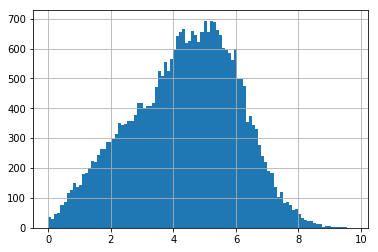

In [25]:
new_df_rand.KL_div.hist(bins=100)

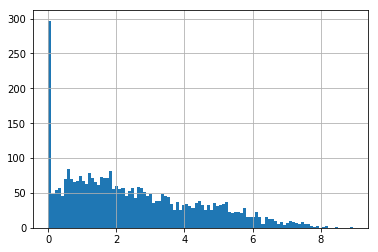

In [26]:
new_df.KL_div.hist(bins=100)

In [52]:
new_df[(new_df.KL_div < 3) & (new_df.KL_div > 2)][['summarizations1','summarizations2','KL_div']]

,summarizations1,summarizations2,KL_div
10,"The Cell Cycle, Mitosis, and Meiosis, In Chapt...","Error Not Found, Use this resource to test you...",2.204992
11,"Error Not Found, Use this resource to test you...","Mitosis: An Interactive Animation, Interactive...",2.648803
12,"Mitosis: An Interactive Animation, Interactive...",Cell Division 7th grade quiz questions - ProPr...,2.158199
21,"Teacher Supplies, This document contains a lis...",Scavenger Hunt!What is the name of this projec...,2.718647
25,Your goal: There is an object under the square...,The Mystery Box model must show.WHAT is inside...,2.768626
26,"Movie triangle.docx, Note sheet to be used whi...",Name the four areas that Persians conquered du...,2.951664
29,"Pacific Wartheatre of war, World War II Writte...","Thursday, May 20, 2010 Burton W. Folsom Econom...",2.340041
35,Radiation is energy that travels and spreads o...,"Presentation: The Electromagnetic Spectrum, A ...",2.258085
40,Page Not Found - BrainPOP skip to main content...,"interface, Although all plants go through a li...",2.446370
49,Congressional Procedures Books We Recommend Tr...,What are two of the most powerful committees i...,2.586686


In [50]:
new_df.iloc[133]

collection_id1                  06f795cc-ca49-4e88-bef7-feea43e0efb6
collection_id2                  06f795cc-ca49-4e88-bef7-feea43e0efb6
sequence_id1                                                       1
sequence_id2                                                       2
resource_id1                    2fa42125-a646-4bcf-897b-dc17d3a93e63
resource_id2                    af5d4d13-b35a-419a-abed-c5c518122999
summarizations1    Read the Magnuson-Stevens Fishery Conservation...
summarizations2    For example: The NMSA provides the program wit...
lda_topics1        [0.044695556, 0.00058139535, 0.00058139535, 0....
lda_topics2        [0.0008064516, 0.0008064516, 0.0008064516, 0.0...
KL_div                                                       2.86804
Name: 133, dtype: object

In [13]:
new_df_rand.shape

(30000, 10)

In [34]:
df_lda.groupby(['collection_id']).agg(['count']).shape

(1393, 43)

In [18]:
df_lda.collection_id

0       001ed871-f958-4f85-a638-6219d47b3935
1       001ed871-f958-4f85-a638-6219d47b3935
2       001ed871-f958-4f85-a638-6219d47b3935
3       00247455-2bac-4152-af3f-0b33860e7e15
4       00413ae4-2088-4319-97b1-8216a4fee1e7
5       00413ae4-2088-4319-97b1-8216a4fee1e7
6       00413ae4-2088-4319-97b1-8216a4fee1e7
7       008fe8b8-abad-4f91-9aa9-184117b8fd44
8       008fe8b8-abad-4f91-9aa9-184117b8fd44
9       008fe8b8-abad-4f91-9aa9-184117b8fd44
10      008fe8b8-abad-4f91-9aa9-184117b8fd44
11      008fe8b8-abad-4f91-9aa9-184117b8fd44
12      008fe8b8-abad-4f91-9aa9-184117b8fd44
13      008fe8b8-abad-4f91-9aa9-184117b8fd44
14      008fe8b8-abad-4f91-9aa9-184117b8fd44
15      008fe8b8-abad-4f91-9aa9-184117b8fd44
16      008fe8b8-abad-4f91-9aa9-184117b8fd44
17      008fe8b8-abad-4f91-9aa9-184117b8fd44
18      008fe8b8-abad-4f91-9aa9-184117b8fd44
19      00a31a04-19a7-4160-9b48-0d5cad6d5976
20      00a31a04-19a7-4160-9b48-0d5cad6d5976
21      00a31a04-19a7-4160-9b48-0d5cad6d5976
22      00

In [9]:
df_rand = util.generate_random_collections_df(rand_col)

In [12]:
df_rand.to_csv('./data/rand_collection_science.csv',index=False)